In [18]:
import psycopg2
import pandas as pd

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [20]:
import matplotlib.pyplot as plt

In [21]:
from sklearn.decomposition import PCA

In [22]:
import seaborn as sns

In [23]:
# Defining connection parameters
dbname = "telecomdb"
user = "posgres"
password = "admin"
host = "localhost"  # or your specific host if different
port = "5432"  # or your specific port if different

In [24]:
# Define connection parameters
dbname = "telecomdb"
user = "postgres"
password = "admin"
host = "localhost"
port = "5432"

try:
    # Establish a connection to the database
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    
    # Create a cursor object using the connection
    cursor = conn.cursor()
    
    # Query to fetch columns of the table "xdr_data"
    query = """
    SELECT column_name
    FROM information_schema.columns
    WHERE table_schema = 'public' AND table_name = 'xdr_data'
    """
    
    # Execute the query
    cursor.execute(query)
    
    # Fetch all results
    columns = cursor.fetchall()
    
    # Print the column names
    print("Columns of the table 'xdr_data':")
    for column in columns:
        print(column[0])
        
    # Close the cursor and connection
    cursor.close()
    conn.close()

except psycopg2.Error as e:
    print("Error: Could not connect to the database.", e)


Columns of the table 'xdr_data':
Bearer Id
Start
Start ms
End
End ms
Dur. (ms)
IMSI
MSISDN/Number
IMEI
Last Location Name
Avg RTT DL (ms)
Avg RTT UL (ms)
Avg Bearer TP DL (kbps)
Avg Bearer TP UL (kbps)
TCP DL Retrans. Vol (Bytes)
TCP UL Retrans. Vol (Bytes)
DL TP < 50 Kbps (%)
50 Kbps < DL TP < 250 Kbps (%)
250 Kbps < DL TP < 1 Mbps (%)
DL TP > 1 Mbps (%)
UL TP < 10 Kbps (%)
10 Kbps < UL TP < 50 Kbps (%)
50 Kbps < UL TP < 300 Kbps (%)
UL TP > 300 Kbps (%)
HTTP DL (Bytes)
HTTP UL (Bytes)
Activity Duration DL (ms)
Activity Duration UL (ms)
Dur. (ms).1
Handset Manufacturer
Handset Type
Nb of sec with 125000B < Vol DL
Nb of sec with 1250B < Vol UL < 6250B
Nb of sec with 31250B < Vol DL < 125000B
Nb of sec with 37500B < Vol UL
Nb of sec with 6250B < Vol DL < 31250B
Nb of sec with 6250B < Vol UL < 37500B
Nb of sec with Vol DL < 6250B
Nb of sec with Vol UL < 1250B
Social Media DL (Bytes)
Social Media UL (Bytes)
Google DL (Bytes)
Google UL (Bytes)
Email DL (Bytes)
Email UL (Bytes)
Youtube DL (

In [25]:

# Define connection parameters
dbname = "telecomdb"
user = "postgres"
password = "admin"
host = "localhost"
port = "5432"

try:
    # Establish a connection to the database
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    print("Connected to the database.")
    
    # Create a cursor object using the connection
    cursor = conn.cursor()

    # SQL query to aggregate per user information
    query = """
    SELECT "MSISDN/Number",
           COUNT(*) AS num_sessions,
           SUM("Dur. (ms)") AS total_session_duration,
           SUM("Total UL (Bytes)") AS total_ul_data,
           SUM("Total DL (Bytes)") AS total_dl_data,
           SUM("Social Media DL (Bytes)" + "Social Media UL (Bytes)") AS social_media_data,
           SUM("Google DL (Bytes)" + "Google UL (Bytes)") AS google_data,
           SUM("Email DL (Bytes)" + "Email UL (Bytes)") AS email_data,
           SUM("Youtube DL (Bytes)" + "Youtube UL (Bytes)") AS youtube_data,
           SUM("Netflix DL (Bytes)" + "Netflix UL (Bytes)") AS netflix_data,
           SUM("Gaming DL (Bytes)" + "Gaming UL (Bytes)") AS gaming_data,
           SUM("Other DL (Bytes)" + "Other UL (Bytes)") AS other_data
    FROM xdr_data
    GROUP BY "MSISDN/Number"
    """

    # Execute the query
    cursor.execute(query)

    # Fetch all results into a DataFrame
    columns = [desc[0] for desc in cursor.description]
    user_data = pd.DataFrame(cursor.fetchall(), columns=columns)

    # Close the cursor
    cursor.close()
    
    # Print first few rows of the DataFrame
    print(user_data.head())

    # Close the connection
    conn.close()
    print("Connection to the database closed.")

except psycopg2.Error as e:
    print("Error: Could not connect to the database.", e)


Connected to the database.
   MSISDN/Number  num_sessions  total_session_duration  total_ul_data  \
0   3.360100e+10             1                116720.0     36053108.0   
1   3.360100e+10             1                181230.0     36104459.0   
2   3.360100e+10             1                134969.0     39306820.0   
3   3.360101e+10             1                 49878.0     20327526.0   
4   3.360101e+10             2                 37104.0     94280527.0   

   total_dl_data  social_media_data  google_data  email_data  youtube_data  \
0   8.426375e+08          2232135.0    4389005.0   1331362.0    21624548.0   
1   1.207552e+08          2660565.0    5334863.0   3307781.0    12432223.0   
2   5.566597e+08          3195623.0    3443126.0   3205380.0    21333570.0   
3   4.019932e+08           280294.0    9678493.0   2284670.0     6977321.0   
4   1.363130e+09          2912542.0   18499616.0   3305469.0    41533002.0   

   netflix_data   gaming_data   other_data  
0    27180981.0  8.1

In [26]:
user_data.head()

,MSISDN/Number,num_sessions,total_session_duration,total_ul_data,total_dl_data,social_media_data,google_data,email_data,youtube_data,netflix_data,gaming_data,other_data
0,3.360100e+10,1,116720.0,36053108.0,8.426375e+08,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
1,3.360100e+10,1,181230.0,36104459.0,1.207552e+08,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
2,3.360100e+10,1,134969.0,39306820.0,5.566597e+08,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3,3.360101e+10,1,49878.0,20327526.0,4.019932e+08,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
4,3.360101e+10,2,37104.0,94280527.0,1.363130e+09,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0


In [27]:
# Describe all relevant variables and associated data types
print(user_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106857 entries, 0 to 106856
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   MSISDN/Number           106856 non-null  float64
 1   num_sessions            106857 non-null  int64  
 2   total_session_duration  106857 non-null  float64
 3   total_ul_data           106857 non-null  float64
 4   total_dl_data           106857 non-null  float64
 5   social_media_data       106857 non-null  float64
 6   google_data             106857 non-null  float64
 7   email_data              106857 non-null  float64
 8   youtube_data            106857 non-null  float64
 9   netflix_data            106857 non-null  float64
 10  gaming_data             106857 non-null  float64
 11  other_data              106857 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 9.8 MB
None


In [28]:
# Analyze basic metrics
print("Basic Metrics:")
print(user_data.describe())


Basic Metrics:
       MSISDN/Number   num_sessions  total_session_duration  total_ul_data  \
count   1.068560e+05  106857.000000            1.068570e+05   1.068570e+05   
mean    4.511474e+10       1.403755            1.468438e+05   5.772370e+07   
std     2.889423e+12       3.355032            2.892198e+05   1.400375e+08   
min     3.360100e+10       1.000000            7.142000e+03   2.866892e+06   
25%     3.365088e+10       1.000000            7.130900e+04   3.639554e+07   
50%     3.366365e+10       1.000000            1.027410e+05   4.679434e+07   
75%     3.368344e+10       2.000000            1.727990e+05   6.573376e+07   
max     8.823971e+14    1066.000000            7.244640e+07   4.432530e+10   

       total_dl_data  social_media_data   google_data    email_data  \
count   1.068570e+05       1.068570e+05  1.068570e+05  1.068570e+05   
mean    6.382035e+08       2.566415e+06  1.095953e+07  3.171225e+06   
std     1.558474e+09       6.325032e+06  2.630542e+07  7.661339e+06  

In [29]:
# Compute dispersion parameters for each quantitative variable
dispersion_parameters = user_data.var()
print("Dispersion Parameters:")
print(dispersion_parameters)


Dispersion Parameters:
MSISDN/Number             8.348768e+24
num_sessions              1.125624e+01
total_session_duration    8.364809e+10
total_ul_data             1.961050e+16
total_dl_data             2.428841e+18
social_media_data         4.000603e+13
google_data               6.919751e+14
email_data                5.869612e+13
youtube_data              5.983623e+15
netflix_data              5.943821e+15
gaming_data               2.189520e+18
other_data                2.099786e+18
dtype: float64


In [30]:
# pip uninstall matplotlib

In [31]:
#pip install matplotlib


In [ ]:
# List of applications
applications = ['social_media_data', 'google_data', 'email_data', 'youtube_data', 'netflix_data', 'gaming_data', 'other_data']

# Plot scatter plots for each application
plt.figure(figsize=(16, 12))
for i, app in enumerate(applications, 1):
    plt.subplot(3, 3, i)
    plt.scatter(user_data[app], user_data['total_ul_data'] + user_data['total_dl_data'], color='blue')
    plt.title(f'{app.capitalize()} Data vs Total DL+UL Data')
    plt.xlabel(f'{app.capitalize()} Data (Bytes)')
    plt.ylabel('Total DL+UL Data (Bytes)')

plt.tight_layout()
plt.show()


In [33]:
# Segment the users into decile classes based on total session duration
deciles = pd.qcut(user_data['total_session_duration'], q=5, labels=False)
user_data['decile'] = deciles

# Compute total data (DL+UL) per decile class
total_data_per_decile = user_data.groupby('decile')[['total_ul_data', 'total_dl_data']].sum()
print("Total Data (DL+UL) per Decile Class:")
print(total_data_per_decile)


Total Data (DL+UL) per Decile Class:
        total_ul_data  total_dl_data
decile                              
0        9.547430e+11   1.059394e+13
1        1.044428e+12   1.152621e+13
2        9.605178e+11   1.060947e+13
3        1.157958e+12   1.281675e+13
4        2.050534e+12   2.265014e+13


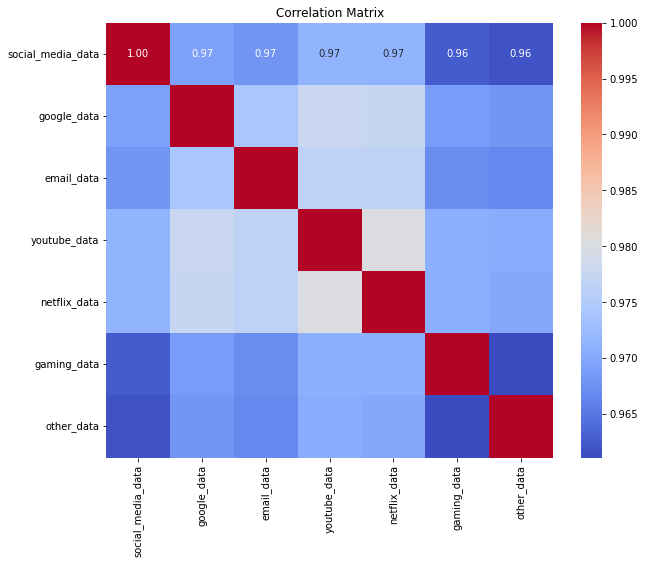

In [34]:
# Computing correlation matrix
correlation_matrix = user_data[['social_media_data', 'google_data', 'email_data', 'youtube_data', 
                                'netflix_data', 'gaming_data', 'other_data']].corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



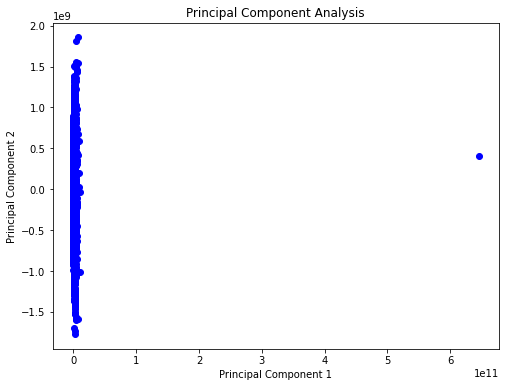

In [35]:

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(user_data[['social_media_data', 'google_data', 'email_data', 
                                                    'youtube_data', 'netflix_data', 'gaming_data', 'other_data']])
# Visualize results
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], color='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.show()


Feature Importances:
num_sessions: 0.0
total_session_duration: 1.0
total_ul_data: 0.0
total_dl_data: 0.0
social_media_data: 0.0
google_data: 0.0
email_data: 0.0
youtube_data: 0.0
netflix_data: 0.0
gaming_data: 0.0
other_data: 0.0


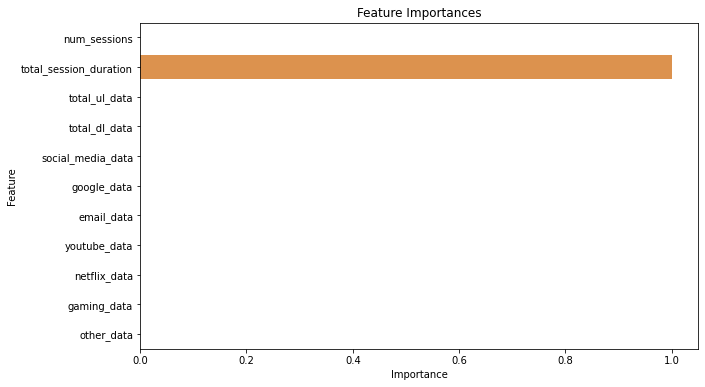

In [36]:

from sklearn.ensemble import RandomForestRegressor

# Separate features and target variable
X = user_data.drop(columns=['MSISDN/Number', 'decile'])  # Features
y = user_data['decile']  # Target variable

# Fit Random Forest model to get feature importances
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_
feature_names = X.columns

# Step 4: Feature Importance
print("Feature Importances:")
for feature_name, importance in zip(feature_names, feature_importances):
    print(f"{feature_name}: {importance}")

# Step 5: Visualization
# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [37]:

# Analysis:
# - The Random Forest model indicates that 'total_session_duration' is the most important feature for predicting the 'decile' value, while all other features have negligible importance.
# - There appears to be a strong relationship between total session duration and the target variable, with longer sessions likely corresponding to higher decile values.

# Recommendations:
# - Focus on strategies that increase total session duration, such as improving user engagement, enhancing content relevance, or optimizing user experience.
# - Explore ways to personalize content or services based on user session behavior to encourage longer and more frequent sessions.
# - Consider implementing features or incentives that incentivize users to extend their session duration or increase their engagement with the platform.

# Step 7: Risk Assessment

# Considerations:
# - Validate Results: Validate the findings of the Random Forest model by conducting additional analyses or experiments to confirm the importance of 'total_session_duration' and understand its impact on user behavior.
# - External Factors: Consider external factors that may influence session duration, such as seasonality, marketing campaigns, or changes in user preferences or demographics.
# - Data Quality: Ensure the accuracy and reliability of data related to session duration to avoid biases or inaccuracies in the analysis.

# Step 8: Continuous Monitoring

# Considerations:
# - Monitor Changes: Continuously monitor changes in user behavior, session patterns, and platform usage to identify any shifts in trends or patterns.
# - Experimentation: Conduct experiments or A/B tests to evaluate the effectiveness of strategies aimed at increasing session duration and measure their impact on user engagement and satisfaction.
# - Adaptation: Adapt strategies and interventions based on ongoing monitoring and feedback to optimize session duration and enhance user experience over time.

# Emphasize the importance of focusing on 'total_session_duration' as a key driver of user engagement and business success, while remaining vigilant about external factors and data quality considerations.


# Task 2

# Step 1: Aggregating Engagement Metrics Per Customer aggregate session frequency, session duration, and total session traffic per customer.
# Report the top 10 customers per engagement metric.

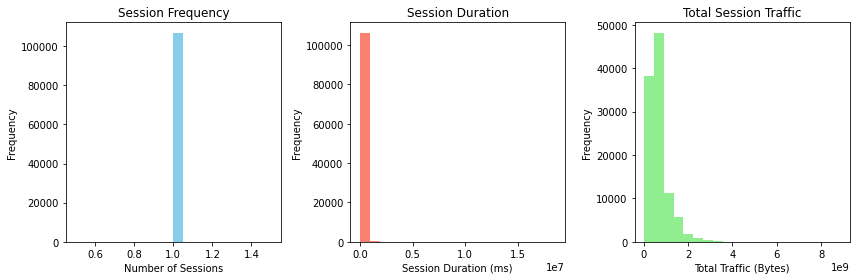

In [38]:

class DataAggregator:
    def __init__(self, user_data):
        self.user_data = user_data

    def aggregate_engagement_metrics(self):
        # Aggregate session frequency, duration, and total traffic per customer
        engagement_metrics = self.user_data.groupby('MSISDN/Number').agg({
            'num_sessions': 'count',
            'total_session_duration': 'sum',
            'total_ul_data': 'sum',
            'total_dl_data': 'sum'
        })

        # Plot histograms for session frequency, duration, and total traffic
        self.plot_histograms(engagement_metrics)

        return engagement_metrics

    def plot_histograms(self, engagement_metrics):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.hist(engagement_metrics['num_sessions'], bins=20, color='skyblue')
        plt.title('Session Frequency')
        plt.xlabel('Number of Sessions')
        plt.ylabel('Frequency')

        plt.subplot(1, 3, 2)
        plt.hist(engagement_metrics['total_session_duration'], bins=20, color='salmon')
        plt.title('Session Duration')
        plt.xlabel('Session Duration (ms)')
        plt.ylabel('Frequency')

        plt.subplot(1, 3, 3)
        plt.hist(engagement_metrics['total_ul_data'] + engagement_metrics['total_dl_data'], bins=20, color='lightgreen')
        plt.title('Total Session Traffic')
        plt.xlabel('Total Traffic (Bytes)')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

data_aggregator = DataAggregator(user_data)

# Call the aggregate_engagement_metrics method
engagement_metrics = data_aggregator.aggregate_engagement_metrics()


# Step 2: Normalize Engagement Metrics Normalize each engagement metric to prepare for clustering.Run a k-means clustering algorithm with appriopraite k- means value from elbow analysis to classify customers based on engagement.

In [39]:
# Check for NaN values
nan_values = user_data.isna().sum()

# Print NaN values for each column
print("NaN values in each column:")
print(nan_values)


NaN values in each column:
MSISDN/Number             1
num_sessions              0
total_session_duration    0
total_ul_data             0
total_dl_data             0
social_media_data         0
google_data               0
email_data                0
youtube_data              0
netflix_data              0
gaming_data               0
other_data                0
decile                    0
dtype: int64


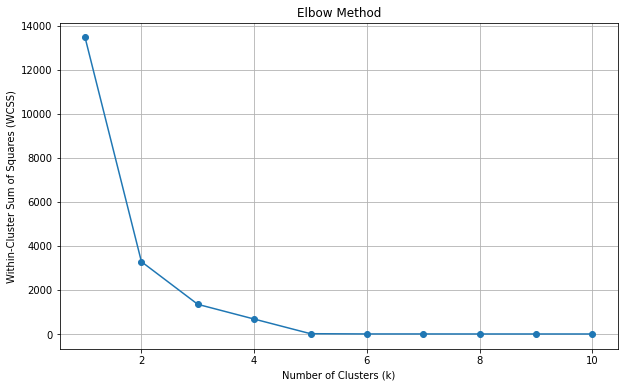

In [42]:
def elbow_method(data, max_k):
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    
    # Normalize the data
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    
    # Calculate WCSS for different values of k
    wcss = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(normalized_data)
        wcss.append(kmeans.inertia_)  # Inertia is the within-cluster sum of squares
        
    # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='-')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.grid(True)
    plt.show()


max_k = 10

# Apply the Elbow Method
elbow_method(user_data, max_k)


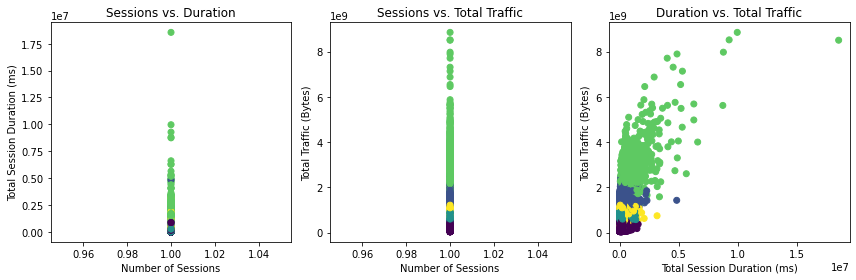

In [44]:
def clustering(engagement_metrics):
    # Normalize engagement metrics
    scaler = MinMaxScaler()
    normalized_engagement_metrics = scaler.fit_transform(engagement_metrics)

    # Perform k-means clustering with k=5
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(normalized_engagement_metrics)
    cluster_labels = kmeans.labels_
    engagement_metrics['Cluster'] = cluster_labels

    # Plot clustered metrics
    plot_clustered_metrics(engagement_metrics)

    return engagement_metrics

def plot_clustered_metrics(engagement_metrics):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.scatter(engagement_metrics['num_sessions'], engagement_metrics['total_session_duration'], c=engagement_metrics['Cluster'], cmap='viridis')
    plt.title('Sessions vs. Duration')
    plt.xlabel('Number of Sessions')
    plt.ylabel('Total Session Duration (ms)')

    plt.subplot(1, 3, 2)
    plt.scatter(engagement_metrics['num_sessions'], engagement_metrics['total_ul_data'] + engagement_metrics['total_dl_data'], c=engagement_metrics['Cluster'], cmap='viridis')
    plt.title('Sessions vs. Total Traffic')
    plt.xlabel('Number of Sessions')
    plt.ylabel('Total Traffic (Bytes)')

    plt.subplot(1, 3, 3)
    plt.scatter(engagement_metrics['total_session_duration'], engagement_metrics['total_ul_data'] + engagement_metrics['total_dl_data'], c=engagement_metrics['Cluster'], cmap='viridis')
    plt.title('Duration vs. Total Traffic')
    plt.xlabel('Total Session Duration (ms)')
    plt.ylabel('Total Traffic (Bytes)')

    plt.tight_layout()
    plt.show()

# Example usage:
# Call the function to cluster and plot the metrics
clustered_metrics = clustering(engagement_metrics)


        num_sessions                 total_session_duration              \
                 min max mean    sum                    min         max   
Cluster                                                                   
0                  1   1  1.0  40089                 7189.0   1573420.0   
1                  1   1  1.0   9866                21994.0   4838428.0   
2                  1   1  1.0  39881                 7142.0   1375612.0   
3                  1   1  1.0   2555                66594.0  18553754.0   
4                  1   1  1.0  14465                 9144.0   3174824.0   

                                     total_ul_data                             \
                  mean           sum           min          max          mean   
Cluster                                                                         
0        105842.027589  4.243101e+09     5276726.0  104979086.0  4.213848e+07   
1        262752.441111  2.592316e+09    36109557.0  221537101.0  1.035059e+

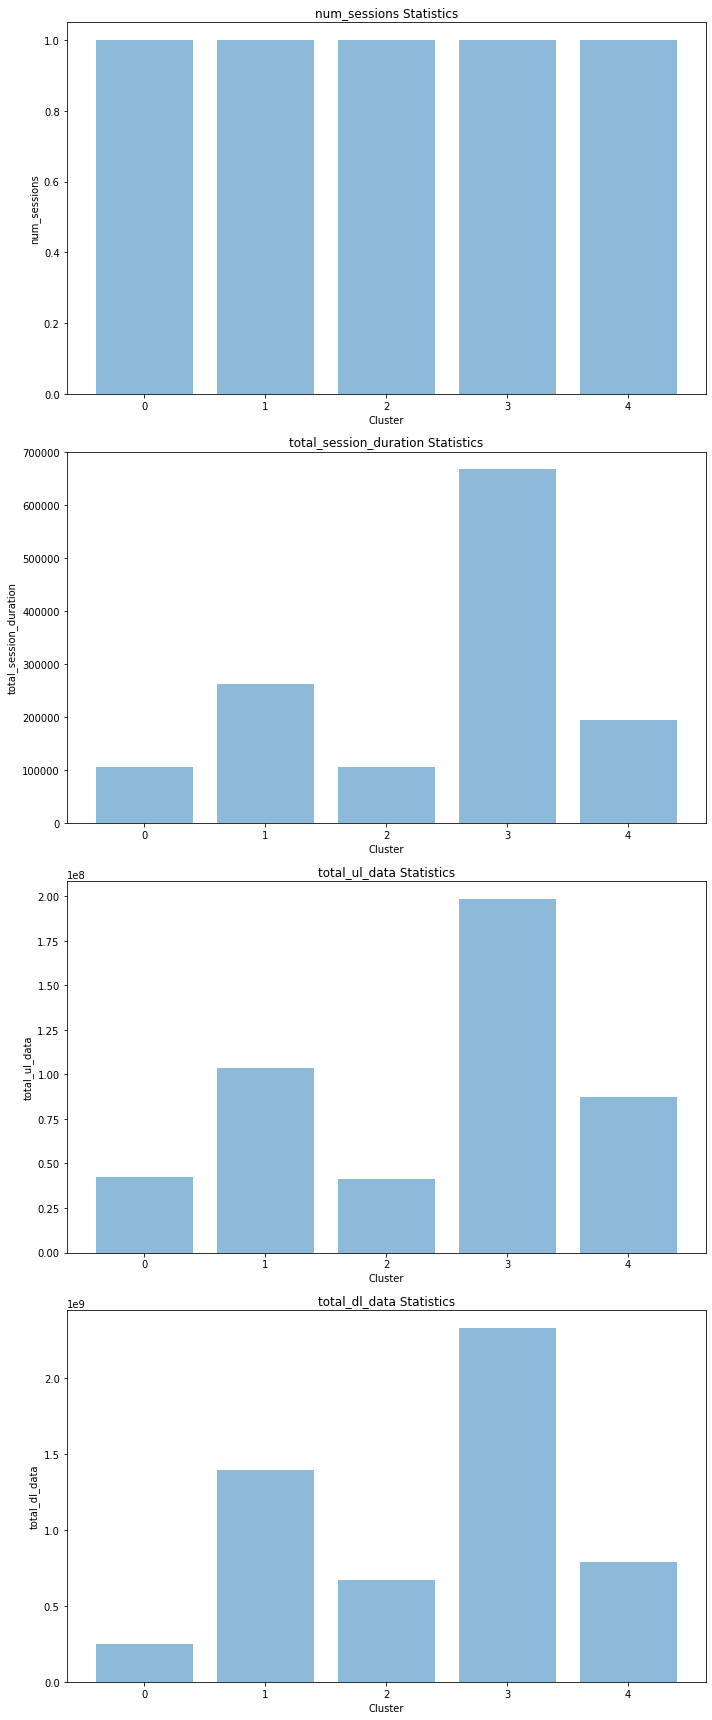

In [45]:
def compute_cluster_statistics(engagement_metrics):
    cluster_statistics = engagement_metrics.groupby('Cluster').agg({
        'num_sessions': ['min', 'max', 'mean', 'sum'],
        'total_session_duration': ['min', 'max', 'mean', 'sum'],
        'total_ul_data': ['min', 'max', 'mean', 'sum'],
        'total_dl_data': ['min', 'max', 'mean', 'sum']
    })
    return cluster_statistics

def plot_cluster_statistics(cluster_statistics):
    metrics = cluster_statistics.columns.levels[0]

    num_plots = len(metrics)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 6*num_plots))

    for i, metric in enumerate(metrics):
        ax = axes[i]
        ax.bar(cluster_statistics.index, cluster_statistics[(metric, 'mean')], alpha=0.5, align='center', capsize=5)
        ax.set_title(f'{metric} Statistics')
        ax.set_xlabel('Cluster')
        ax.set_ylabel(metric)
        ax.set_xticks(cluster_statistics.index)

    plt.tight_layout()
    plt.show()

# Call the function to compute and plot cluster statistics
cluster_statistics = compute_cluster_statistics(engagement_metrics)
print(cluster_statistics)
plot_cluster_statistics(cluster_statistics)


In [82]:
print(user_data.columns)


Index(['MSISDN/Number', 'num_sessions', 'total_session_duration',
       'total_ul_data', 'total_dl_data', 'social_media_data', 'google_data',
       'email_data', 'youtube_data', 'netflix_data', 'gaming_data',
       'other_data', 'decile'],
      dtype='object')


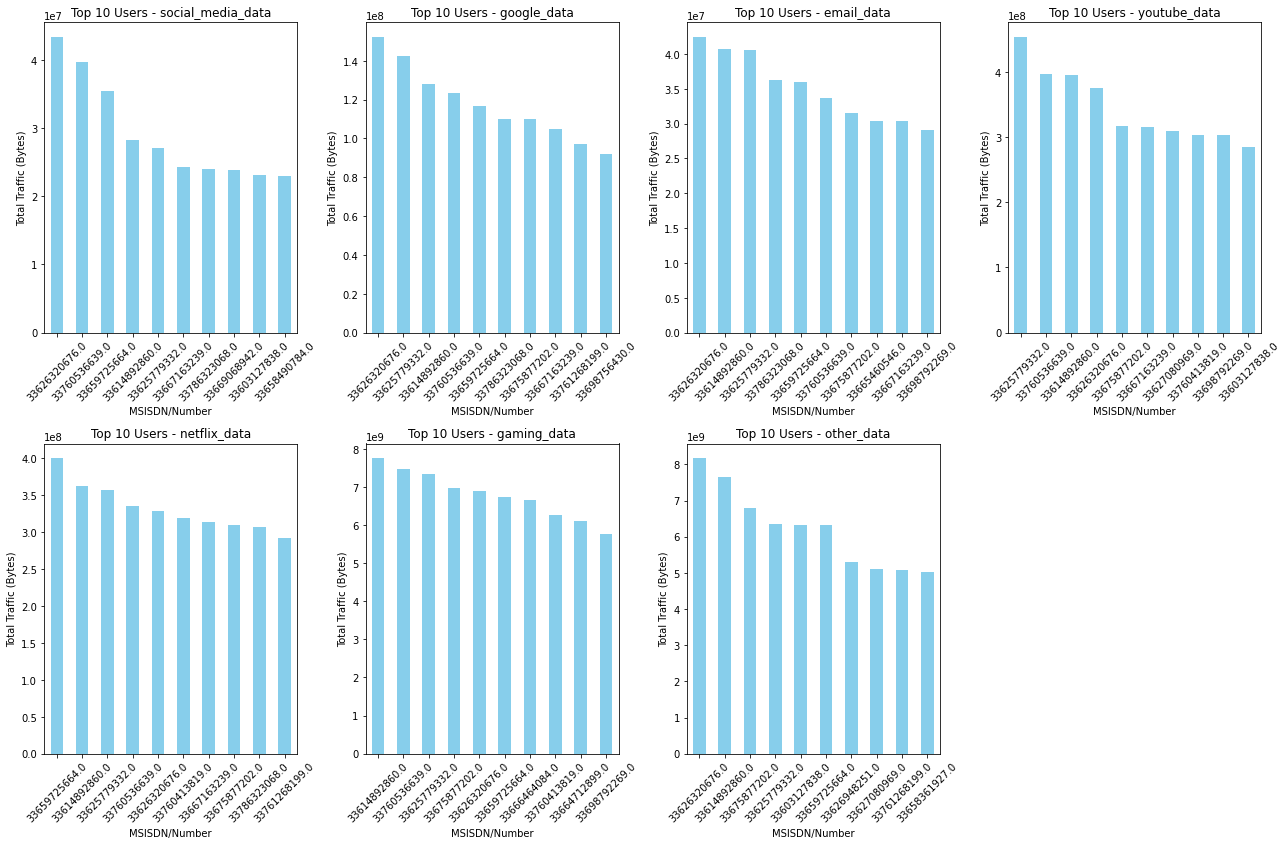

In [46]:
import numpy as np
class ApplicationEngagement:
    def __init__(self, user_data):
        self.user_data = user_data

    def top_engaged_users_per_app(self):
        user_traffic_per_app = self.user_data.groupby('MSISDN/Number')[['social_media_data', 'google_data',
                                                                        'email_data', 'youtube_data',
                                                                        'netflix_data', 'gaming_data',
                                                                        'other_data']].sum()

        top_10_users_per_app = {}
        for column in user_traffic_per_app.columns:
            top_10_users_per_app[column] = user_traffic_per_app[column].nlargest(10)

        self.plot_top_engaged_users(top_10_users_per_app)
        return top_10_users_per_app

    def plot_top_engaged_users(self, top_10_users_per_app):
        num_apps = len(top_10_users_per_app)
        num_rows = 2  # Adjust the number of rows and columns as needed
        num_cols = int(np.ceil(num_apps / num_rows))

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))

        for i, (app, top_users) in enumerate(top_10_users_per_app.items()):
            ax = axes[i // num_cols, i % num_cols] if num_apps > 1 else axes
            top_users.plot(kind='bar', color='skyblue', ax=ax)
            ax.set_title(f'Top 10 Users - {app}')
            ax.set_xlabel('MSISDN/Number')
            ax.set_ylabel('Total Traffic (Bytes)')
            ax.tick_params(axis='x', rotation=45)
        
        for j in range(i + 1, num_rows * num_cols):
            fig.delaxes(axes[j // num_cols, j % num_cols])

        plt.tight_layout()
        plt.show()

# Example usage:
app_engagement = ApplicationEngagement(user_data)
top_users_per_app = app_engagement.top_engaged_users_per_app()


In [105]:
user_data.head()

,MSISDN/Number,num_sessions,total_session_duration,total_ul_data,total_dl_data,social_media_data,google_data,email_data,youtube_data,netflix_data,gaming_data,other_data,decile
0,3.360100e+10,1,116720.0,36053108.0,8.426375e+08,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0,2
1,3.360100e+10,1,181230.0,36104459.0,1.207552e+08,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0,3
2,3.360100e+10,1,134969.0,39306820.0,5.566597e+08,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0,3
3,3.360101e+10,1,49878.0,20327526.0,4.019932e+08,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0,0
4,3.360101e+10,2,37104.0,94280527.0,1.363130e+09,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0,0


In [ ]:
class DataVisualization:
    def __init__(self, user_traffic_per_app):
        self.user_traffic_per_app = user_traffic_per_app

    def plot_top_3_apps(self):
        if self.user_traffic_per_app is not None:
            # Group data by MSISDN/Number and sum the traffic for each application
            user_traffic_per_app = self.user_traffic_per_app.groupby('MSISDN/Number').sum()

            # Plot the top 3 most used applications
            if not user_traffic_per_app.empty:
                top_3_apps = user_traffic_per_app.sum().nlargest(3).index
                top_3_traffic = user_traffic_per_app[top_3_apps]

                plt.figure(figsize=(10, 6))
                top_3_traffic.plot(kind='bar', stacked=True)
                plt.title('Top 3 Most Used Applications')
                plt.xlabel('MSISDN/Number')
                plt.ylabel('Total Traffic (Bytes)')
                plt.show()
            else:
                print("No data available for visualization.")
        else:
            print("No data available for visualization.")


# Instantiate the DataVisualization class
data_visualization = DataVisualization(user_data)

# Plot the top 3 most used applications
data_visualization.plot_top_3_apps()


<Figure size 720x432 with 0 Axes>

# Step 3: Analyze Clusters Compute minimum, maximum, average, and totalnon-normalized metrics for each cluster. Interpret the results visually with accompanying text explaining the findings.

In [101]:
class ClusterAnalysis:
    def __init__(self, engagement_metrics):
        self.engagement_metrics = engagement_metrics

    def analyze_clusters(self):
        # Compute statistics for each cluster
        cluster_statistics = self.engagement_metrics.groupby('Cluster').agg({
            'num_sessions': ['min', 'max', 'mean', 'sum'],
            'total_session_duration': ['min', 'max', 'mean', 'sum'],
            'total_ul_data': ['min', 'max', 'mean', 'sum'],
            'total_dl_data': ['min', 'max', 'mean', 'sum']
        })

        # Plotting the cluster statistics
        self.plot_cluster_statistics(cluster_statistics)

        return cluster_statistics

    def plot_cluster_statistics(self, cluster_statistics):
        # Plotting
        sns.set(style="whitegrid")
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
        plt.subplots_adjust(hspace=0.4)

        for i, (metric, stats) in enumerate(cluster_statistics.iteritems()):
            ax = axes[i // 2, i % 2]
            sns.barplot(x=stats.index, y=stats.values, ax=ax)
            ax.set_title(metric[0])

        plt.show()

# Example usage:
# Replace 'engagement_metrics' with your actual DataFrame containing cluster information
# analysis = ClusterAnalysis(engagement_metrics)
# analysis.analyze_clusters()
